# Capstone Project: State Farm Distracted Driver Detection

# Step 0: Import Datasets



According to the CDC motor vehicle safety division, one in five car accidents is caused by a distracted driver. Sadly, this translates to 425,000 people injured and 3,000 people killed by distracted driving every year.
State Farm hopes to improve these alarming statistics, and better insure their customers, by testing whether dashboard cameras can automatically detect drivers engaging in distracted behaviors. Given a dataset of 2D dashboard camera images, State Farm gave challenge to classify each driver's behavior. Are they driving attentively, wearing their seatbelt, or taking a selfie with their friends in the backseat.

In this project we are given driver images, each taken in a car with a driver doing something in the car (texting, eating, talking on the phone, makeup, reaching behind, etc). Our goal is to predict the likelihood of what the driver is doing in each picture. 
The 10 classes to be predicted are:
c0: normal driving (normal driving requires both hands on the steering wheel and forward gaze" above)
c1: texting – right (phone in the right hand and person texting)
c2: talking on the phone – right (phone in the right hand placed over the right ear)
c3: texting – left (phone in the left hand and person texting)
c4: talking on the phone – left (phone in the left hand placed over the left ear)
c5: operating the radio (right hand extended towards radio, so right hand is not on the steering wheel)
c6: drinking (right hand holding the cup)
c7: reaching behind ( right hand trying to reach the back passenger seat)
c8: hair and makeup (hand on face or hair, so hand is not on the steering wheel)
c9: talking to passenger (no forward gaze, driver facing the passenger seat  and talking)
The train and test data are split on the drivers, such that one driver can only appear on either train or test set. 


In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 10)
    return files, targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('imgs/train')
valid_files, valid_targets = load_dataset('imgs/valid')
test_files, test_targets = load_dataset('imgs/test')

unlabelled_test_files = np.array(glob("imgs_test/unlabelled_data/*"))

# load list of category names
names = [item[11:-1] for item in sorted(glob('imgs/train/*/'))]

nb_train_samples = len(train_files)
nb_validation_samples = len(valid_files)
nb_test_samples = len(test_files)
nb_unlabelled_test_samples = len(unlabelled_test_files)
train_data_dir = 'imgs/train'
validation_data_dir = 'imgs/valid'
test_data_dir = 'imgs/test'
unlabelled_test_dir = 'imgs_test/unlabelled_test'
# print statistics about the dataset
print('There are %d total categories.' % len(names))
print('There are %s total images.\n' % len(np.hstack([train_files, test_files, valid_files])))
print('There are %d training images.' % nb_train_samples)
print('There are %d validation images.' % nb_validation_samples)
print('There are %d test images.' % len(test_files))
print('There are %d unlabelled test images' % len(unlabelled_test_files))
      
print('category names are {}'.format(names))
print('train targets %s\n' % (train_targets))
#print('valid targets %s\n' % (valid_targets))
print('train files are', train_files)


There are 10 total categories.
There are 22790 total images.

There are 18930 training images.
There are 3490 validation images.
There are 370 test images.
There are 313 unlabelled test images
category names are ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
train targets [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

train files are ['imgs/train/c8/img_3735.jpg' 'imgs/train/c8/img_59130.jpg'
 'imgs/train/c0/img_97780.jpg' ... 'imgs/train/c4/img_97443.jpg'
 'imgs/train/c5/img_49388.jpg' 'imgs/train/c1/img_38140.jpg']


### Analyze Dataset(train files)

** Create csv file of train data**

In [12]:

import pandas as pd
data_train = np.asarray(train_targets)
#print('data_train', data_train)
np.savetxt('train_csv/data_train.csv', data_train, delimiter =',', comments='', newline='\n', fmt='%i')
from IPython.display import FileLink
FileLink('data_train.csv')
sum_train = np.sum(data_train, axis =0, dtype=int)

#print('sum_train', sum_train)
data_sum_train = np.column_stack((np.asarray(names), np.asarray(sum_train)))
#print('data_sum_train', data_sum_train)
np.savetxt('train_csv/data_sum_train.csv', data_sum_train, delimiter =',',comments='', newline='\n', fmt='%s', header = 'name_category,total_files')
from IPython.display import FileLink
FileLink('train_csv/data_sum_train.csv')



/home/ubuntu/.kaggle/competitions/state-farm-distracted-driver-detection/train_csv/data_sum_train.csv

In [13]:
df = pd.read_csv("train_csv/data_sum_train.csv")

print(df.head(5))




  name_category  total_files
0            c0         2110
1            c1         1925
2            c2         1957
3            c3         1966
4            c4         1948


** Plot data **

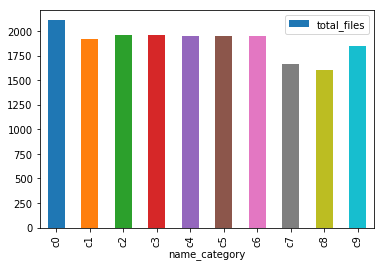

In [11]:
df.plot('name_category', 'total_files', kind='bar')

As seen from the plot each category has more than 1600 images. C0 has the most. Data is almost uniformly distributed among all categories. c7 and c8 have the least number of training images

In [5]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
total_files = np.array(glob("imgs/*/*/*"))
random.shuffle(total_files)

# print statistics about the dataset
print('There are %d total images.' % len(total_files))

There are 22790 total images.


### Display sample image

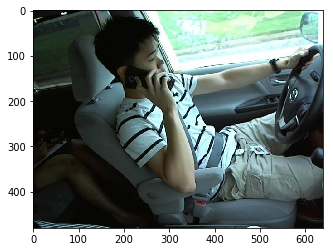

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2    
%matplotlib inline   

import numpy as np

# load color (BGR) image
img = cv2.imread(total_files[15])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [3]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [4]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 370/370 [00:01<00:00, 229.41it/s]


In [4]:
unlabelled_test_tensors = paths_to_tensor(unlabelled_test_files).astype('float32')/255

100%|██████████| 313/313 [00:01<00:00, 179.26it/s]


## Step 1: Create a CNN to Classify Distracted Drivers (from scratch)


**The first convolution layer** has 32filters, 2x2 in size. The input shape is 224x224, 3channels. I took padding as 'same' because I did not want to loose any information. Stride of 1(by default) makes the convolutional layer the same height and width as input layer. The number of weights/ parameters for the first CNN layer is (2X2X3)X32+32= 416

I planned to use at least four CNN layers to extract relevant feature maps. The number of filters in successive CNN layers will be increased in sequence of 32, 64, 128, 256. The more the number of filters means more stacks of feature maps. So, dimensionality of convolutional layers will increase drastically. More parameters can lead to overfitting. Hence pooling layers are used to reduce dimensionality. Using 'Pooling layers' will help in keeping the same number of feature map, but each feature map will reduce in width and height.
I chose the first two pooiling layer with stride of 1 and third and fourth pooling layers with stride of 2.
 
For Conv. layers I used 'relu' as activation function, because it returns positive as it is and converts all negatives to zero.

After the fourth max pooling layer I used 'Global Average Pooling layer' for extreme dimensionality reduction. Now, each feature is reduced to single (average) value. I used the Dropout and Dense combination to adjust for possible overfitting associated with the small training size. Dropout prevents a layer from seeing twice the exact same pattern
It took almost an hour to finish training but could achieve fairly good accuracy of 54.6% with just 18930 images

In [7]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(32, (2, 2), padding='same', input_shape=train_tensors.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=1, padding='same'))
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=1, padding='same'))
model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Conv2D(256, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 223, 223, 64)      8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 223, 223, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 128)     32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 110, 110, 256)     131328    
__________

### Compile the Model

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

In [9]:
from keras.callbacks import ModelCheckpoint  

epochs = 15
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 18930 samples, validate on 3490 samples
Epoch 1/15
18930/18930 [==============================] - 619s 33ms/step - loss: 2.2992 - acc: 0.1083 - val_loss: 2.2834 - val_acc: 0.1229

Epoch 00001: val_loss improved from inf to 2.28339, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/15
18930/18930 [==============================] - 611s 32ms/step - loss: 2.2430 - acc: 0.1433 - val_loss: 2.1916 - val_acc: 0.1848

Epoch 00002: val_loss improved from 2.28339 to 2.19162, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 3/15
18930/18930 [==============================] - 612s 32ms/step - loss: 2.1101 - acc: 0.1943 - val_loss: 2.1537 - val_acc: 0.1662

Epoch 00003: val_loss improved from 2.19162 to 2.15365, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 4/15
18930/18930 [==============================] - 613s 32ms/step - loss: 1.9246 - acc: 0.2491 - val_loss: 1.8000 - val_acc: 0.3241

Epoch 00004: val_loss improved from 2.15365 to 

### Load the Model with the Best Validation Loss

In [10]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model


In [11]:
# get index of predicted class for each image in test set
scratch_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
#print('scratch_predictions.shape', scratch_predictions.shape)

# report test accuracy
test_accuracy = 100*np.sum(np.array(scratch_predictions)==np.argmax(test_targets, axis=1))/len(scratch_predictions)
npascratch_predictions = np.array(scratch_predictions)
print('npascratch_predictions', npascratch_predictions)
print('npascratch_predictions.shape', npascratch_predictions.shape)
npargmaxtest_targets = np.argmax(test_targets, axis=1)
print('npargmaxtest_targets', npargmaxtest_targets)
print('npargmaxtest_targets.shape', npargmaxtest_targets.shape)
print('Test accuracy: %.4f%%' % test_accuracy)

npascratch_predictions [0 0 7 1 7 0 0 0 3 5 1 0 9 9 5 0 3 5 6 1 2 9 7 8 0 5 3 2 8 3 0 0 5 6 1 1 0
 5 3 0 1 3 0 1 2 7 5 1 5 4 2 5 3 1 2 7 9 0 6 1 0 5 6 5 4 5 0 1 8 5 2 9 4 0
 5 1 6 6 7 5 3 0 7 5 0 1 8 9 6 4 2 4 7 6 5 4 9 7 1 3 9 2 6 5 7 6 0 1 3 3 0
 5 8 5 7 1 5 6 6 3 6 0 7 1 7 1 5 8 0 0 3 8 6 3 0 7 0 3 6 1 5 6 8 0 7 7 4 9
 7 6 3 3 1 3 0 3 1 6 1 3 3 5 3 0 5 5 1 4 6 2 1 5 1 0 5 0 4 9 2 2 7 6 8 9 6
 1 5 5 3 9 7 8 4 0 6 4 3 3 7 8 0 0 7 4 3 4 3 0 6 3 2 1 5 7 3 0 0 6 5 0 6 7
 4 1 9 6 5 7 6 2 0 2 5 0 0 6 3 3 0 1 5 0 1 6 3 8 3 7 7 3 7 9 0 0 9 2 6 7 0
 2 3 0 3 5 9 0 8 3 5 1 6 5 4 3 0 0 4 7 2 3 6 2 5 2 7 5 9 8 5 1 5 3 3 3 3 5
 5 6 0 1 6 7 9 2 1 1 2 6 9 1 7 0 2 6 9 5 0 7 0 6 9 3 0 3 5 0 1 0 3 4 2 1 8
 3 6 2 3 2 8 4 5 2 6 1 6 0 4 2 2 4 6 7 6 7 1 4 1 7 5 1 5 5 5 5 6 7 1 2 0 8]
npascratch_predictions.shape (370,)
npargmaxtest_targets [3 3 7 1 7 3 0 3 1 5 2 0 5 5 5 0 3 3 6 1 2 7 7 8 3 5 7 2 8 0 0 4 5 6 7 1 0
 5 3 0 1 1 0 1 4 7 5 8 0 4 2 5 8 6 2 7 1 4 1 1 0 2 2 5 6 5 4 1 8 5 2 7 4 4
 7 1 6 6 7 5 3 0 8 

Traininig from scratch could give accuracy of 54.6%, but it took lot of time in training. Since our dataset is not large enough so learning on such dataset alone (scratch model) will not give good accuracy. I can leverage features already learned by some pretrained models on imagenet dataset. Hopefully I can achieve a better accuracy in shorter time by transfer learning. 

## Step 2: Use VGG16  to Classify Distracted Drivers

To reduce training time without sacrificing accuracy, we train a CNN (VGG16) using transfer learning.  

### Summary of VGG16 (pretrained classifier on imagenet database)

In [5]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'

epochs = 50
batch_size = int(10)

# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

A small fully-connected model on top of the stored features will be used for training. GlobalAveragePooling layer (for dimensionality reduction), and then the fully connected Dense layer with 'softmax' activation function on top of the stored feature will be used for training to give the final prediction and identify among 10 classes in our case.


### Extract bottleneck features for VGG16 network
In order to leverage already learned features of VGG16 on imagenet dataset we will extract bottleneck features. We will only use the convolutional part of the model (everything up to the fully-connected layers) and run this model on our training and validation data once, recording the output (the "bottleneck features" from the VGG16 model)

In [12]:



def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.1,
                                   zoom_range = 0.1,)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    np.save(open('bottleneck_features_train.npy', 'ab'),
            bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_validation.npy', 'ab'),
            bottleneck_features_validation)
    
    generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_test = model.predict_generator(
        generator, nb_test_samples // batch_size)
    np.save(open('bottleneck_features_test.npy', 'ab'),
            bottleneck_features_test)
    
save_bottleneck_features()
    

Found 18930 images belonging to 10 classes.
Found 3490 images belonging to 10 classes.
Found 370 images belonging to 10 classes.


### Model Architecture
The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each distracted driver categoryv(10 nodes) and is equipped with a softmax.

In [6]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
train_VGG16 = np.load(open('bottleneck_features_train.npy', 'rb'))
train_labels = train_targets

    
validation_VGG16 = np.load(open('bottleneck_features_validation.npy', 'rb'))
validation_labels = valid_targets

test_VGG16 = np.load(open('bottleneck_features_test.npy', 'rb'))
test_labels = test_targets

VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(10, activation='softmax'))

VGG16_model.summary()
print('train VGG16 numbers', len(train_VGG16))

print('valid VGG16 numbers', len(validation_VGG16))
print('input shapes train VGG16', train_VGG16.shape[1:])
print('test_VGG16 shapes', test_VGG16.shape[1:])
print('valid_VGG16 shapes', validation_VGG16.shape[1:])

    







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 5,130
Trainable params: 5,130
Non-trainable params: 0
_________________________________________________________________
train VGG16 numbers 18930
valid VGG16 numbers 3490
input shapes train VGG16 (7, 7, 512)
test_VGG16 shapes (7, 7, 512)
valid_VGG16 shapes (7, 7, 512)


### Compile the model

In [9]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the model (save weights to saved_models/weights.best.VGG16.hdf5)

In [38]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(validation_VGG16, valid_targets),
          epochs=5, batch_size=10, callbacks=[checkpointer], verbose=1)


Train on 18930 samples, validate on 3490 samples
Epoch 1/5
18930/18930 [==============================] - 7s 346us/step - loss: 2.3183 - acc: 0.1083 - val_loss: 2.3173 - val_acc: 0.0991

Epoch 00001: val_loss improved from inf to 2.31728, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 2/5
18930/18930 [==============================] - 6s 335us/step - loss: 2.3136 - acc: 0.1114 - val_loss: 2.3211 - val_acc: 0.1000

Epoch 00002: val_loss did not improve
Epoch 3/5
18930/18930 [==============================] - 6s 335us/step - loss: 2.3108 - acc: 0.1179 - val_loss: 2.3266 - val_acc: 0.1043

Epoch 00003: val_loss did not improve
Epoch 4/5
18930/18930 [==============================] - 6s 333us/step - loss: 2.3083 - acc: 0.1153 - val_loss: 2.3227 - val_acc: 0.1054

Epoch 00004: val_loss did not improve
Epoch 5/5
18930/18930 [==============================] - 6s 335us/step - loss: 2.3055 - acc: 0.1218 - val_loss: 2.3265 - val_acc: 0.1014

Epoch 00005: val_loss did not improve


### Load the Model with the Best Validation Loss

In [8]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the model

In [9]:
# get index of predicted class for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]
# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
#for feature in test_VGG16:
   # a= np.expand_dims(feature, axis=0)
   # print('np.expand_dims(feature, axis=0)', a)
    #print('a.shape')
    #b = VGG16_model.predict(a)
    #print('VGG16_model.predict(a)', b)
npaVGG16_predictions = np.array(VGG16_predictions)
print('np.array(VGG16_predictions', npaVGG16_predictions)
print('npaVGG16_predictions.shape', npaVGG16_predictions.shape)
npargmaxtest_targets = np.argmax(test_targets, axis=1)
print('npargmaxtest_targets', npargmaxtest_targets)
print('Test accuracy: %.4f%%' % test_accuracy)

np.array(VGG16_predictions [7 7 7 0 0 7 7 7 7 7 0 0 7 7 7 7 7 0 7 0 7 7 0 7 7 0 9 7 0 0 7 7 7 7 7 7 7
 0 7 7 7 7 7 7 7 0 7 1 7 0 7 1 0 7 7 7 7 7 7 7 0 7 7 0 0 7 0 7 7 7 7 7 0 7
 7 7 7 7 7 7 7 7 0 7 7 0 7 1 0 7 7 7 7 7 7 7 7 0 7 7 7 7 7 7 7 7 7 7 7 7 7
 0 7 7 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 7 0 0 7 7 7 7 7 7 7 7 7 7 7
 1 7 7 7 7 7 7 7 7 7 7 7 7 7 0 7 9 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 9 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 7 7 7 7 7 7 7 7 0 7 0 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 0 7 1 7 0 7 7 7 7 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 7 0 0 7 7 7 7 0 7 0 0 7 7 7 7 7
 7 7 7 7 7 7 7 1 7 9 1 7 0 0 7 7 7 7 7 7 0 7 7 7 0 0 7 7 7 7 7 7 7 7 0 7 7
 0 0 7 7 7 7 7 1 7 0 7 7 7 0 7 0 7 7 7 0 7 0 7 7 7 0 7 7 7 7 7 7 7 7 0 7 7]
npaVGG16_predictions.shape (370,)
npargmaxtest_targets [3 3 7 1 7 3 0 3 1 5 2 0 5 5 5 0 3 3 6 1 2 7 7 8 3 5 7 2 8 0 0 4 5 6 7 1 0
 5 3 0 1 1 0 1 4 7 5 8 0 4 2 5 8 6 2 7 1 4 1 1 0 2 2 5 6 5 4 1 8 5 2 7 4 4
 7 1 6 6 7 5 3 0 

The accuracy is pretty low (11.35%) even as compared to model from scratch. The best validation loss is 2.3 which is high. 

This accuracy is much lower than model from scratch, which is not in line with our expectation.As mentioned in my project proposal I expected this to happen because imagenet dataset has images of humans, but not the same categories as needed in our project.
In order to extract high level features I will have to Fine Tune the model. After fine tuning I expect to reduce the validation loss and increase the accuracy.


### Step 3: Fine-tuning the top layers of a VGG16 network
Ref:https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

I will  "fine-tune" the last convolutional block of the VGG16 model alongside the top-level classifier. Fine-tuning consist in starting from a trained network, then re-training it on a new dataset using very small weight updates. In our case, this can be done in 3 steps:

- instantiate the convolutional base of VGG16 and load its weights
- add our previously defined fully-connected model on top, and load its weights
- freeze the layers of the VGG16 model up to the last convolutional block (15layers in this case)

### New model architecture (with first 15 untrainable layers of VGG16 , and fully connected model on top)

In [7]:

from keras import optimizers
model = applications.VGG16(include_top=False, weights='imagenet')

new_model = Sequential() #new model
for layer in model.layers: 
    new_model.add(layer)



#add the model on top of the convolutional base
new_model.add(VGG16_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in new_model.layers[:15]:
    layer.trainable = False




model.summary()
VGG16_model.summary()

new_model.summary()

        



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Prepare data augmentation configuration

Our data is not very small, but still not large enough and overfitting may become a concern in case of smaller data. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. 

Data augmentation is one way to fight overfitting. Augmentation tend to disrupt random correlations occuring in data. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

Shear mapping or shearing displaces each point in the vertical direction by an amount proportional to its distance from an edge of the image. Shear_range and corresponds to the deviation angle (in radians) between a horizontal line in the original picture and the image (in the mathematical sense) of this line in the transformed image. The transformation zooms the initial image in or out. The zoom_range parameter controls the zooming factor. I have considered shear range and zoom range both as 0.2

I did not consider doing flip or rotaion as they may alter the image to an extent that it may fall into another category (example left hand will become right hand).

We will use .flow_from_directory() to generate batches of image data (and their labels) directly from our jpgs in their respective folders.

In [8]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)


validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 18930 images belonging to 10 classes.
Found 3490 images belonging to 10 classes.



### Compile the model
Fine-tuning should be done with a very slow learning rate. I will use SGD optimizer for fine tuning. This is to make sure that the magnitude of the updates stays very small, so as not to wreck the previously learned features.

The metric used for this Kaggle competition is multi class Logrithmic loss(also known as categorical cross entropy). Since I want to benchmark the output with Kaggle leaderboard results I will use same as performance metric.


In [9]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.

sgd = optimizers.SGD(lr=1e-4, momentum=0.9)
new_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])



### Train the new model

We will use the generators to train the model

In [12]:
# fine-tune the model
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.finetuneVGG16.hdf5', 
                               verbose=1, save_best_only=True)

new_model.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, epochs=5, verbose=1, callbacks= [checkpointer], 
              validation_data = validation_generator, validation_steps = nb_validation_samples // batch_size)


Epoch 1/5
1893/1893 [==============================] - 355s 188ms/step - loss: 2.1005 - acc: 0.2136 - val_loss: 1.3234 - val_acc: 0.4579

Epoch 00001: val_loss improved from inf to 1.32336, saving model to saved_models/weights.best.finetuneVGG16.hdf5
Epoch 2/5
1893/1893 [==============================] - 356s 188ms/step - loss: 0.4310 - acc: 0.8606 - val_loss: 0.7058 - val_acc: 0.7398

Epoch 00002: val_loss improved from 1.32336 to 0.70583, saving model to saved_models/weights.best.finetuneVGG16.hdf5
Epoch 3/5
1893/1893 [==============================] - 356s 188ms/step - loss: 0.1516 - acc: 0.9537 - val_loss: 0.6002 - val_acc: 0.8074

Epoch 00003: val_loss improved from 0.70583 to 0.60022, saving model to saved_models/weights.best.finetuneVGG16.hdf5
Epoch 4/5
1893/1893 [==============================] - 356s 188ms/step - loss: 0.0863 - acc: 0.9756 - val_loss: 0.6575 - val_acc: 0.7885

Epoch 00004: val_loss did not improve
Epoch 5/5
1893/1893 [==============================] - 356s 188

### Load the new model with the best validation loss

In [10]:
new_model.load_weights('saved_models/weights.best.finetuneVGG16.hdf5')

### Test the new_model

In [39]:
# get index of predicted class for each image in test set
new_model_predictions = [np.argmax(new_model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
# report test accuracy
test_accuracy = 100*np.sum(np.array(new_model_predictions)==np.argmax(test_targets, axis=1))/len(new_model_predictions)
npanew_model_predictions = np.array(new_model_predictions)
print('np.array(new_model_predictions', npanew_model_predictions)
print('npanew_model_predictions.shape', npanew_model_predictions.shape)
npargmaxtest_targets = np.argmax(test_targets, axis=1)
print('npargmaxtest_targets', npargmaxtest_targets)
print('Test accuracy: %.4f%%' % test_accuracy)

np.array(new_model_predictions [3 3 8 1 6 3 4 3 1 5 2 0 5 5 5 0 3 3 6 1 2 7 7 8 3 5 7 2 8 4 0 4 5 6 7 1 0
 5 3 0 1 4 0 1 4 7 5 6 9 4 8 5 8 6 8 7 8 4 1 1 0 2 6 5 6 5 4 1 8 5 2 8 4 4
 7 1 6 6 7 5 3 0 8 5 0 4 8 5 6 4 2 7 0 6 9 4 5 8 6 3 0 2 6 5 1 6 0 7 3 3 5
 9 2 5 7 6 3 2 6 7 2 3 5 1 0 3 0 6 9 3 3 6 6 3 0 8 0 4 2 1 5 6 8 9 4 4 2 0
 8 6 1 3 6 4 8 0 6 6 6 9 3 5 4 3 5 3 1 4 6 6 0 5 5 5 5 0 4 3 2 2 4 6 5 0 6
 1 5 5 1 5 7 8 4 3 6 4 1 4 9 2 9 5 8 2 3 3 3 0 8 1 2 8 5 2 3 9 0 2 0 1 1 7
 4 3 8 6 5 8 0 2 0 2 3 3 0 6 3 0 0 1 5 4 4 8 4 6 0 7 7 4 7 1 0 0 8 2 6 1 0
 8 1 0 0 5 8 7 7 3 5 1 6 3 4 0 0 0 4 9 2 4 6 2 8 2 7 4 1 0 5 6 5 3 3 4 3 7
 9 6 5 1 2 7 4 2 1 6 8 6 1 6 7 0 2 6 8 0 0 7 3 6 9 4 4 3 5 4 1 0 3 4 8 6 8
 3 6 8 4 2 8 4 5 8 6 1 2 0 4 8 8 4 8 0 4 7 1 1 1 7 5 6 5 0 9 4 6 6 4 2 1 4]
npanew_model_predictions.shape (370,)
npargmaxtest_targets [3 3 7 1 7 3 0 3 1 5 2 0 5 5 5 0 3 3 6 1 2 7 7 8 3 5 7 2 8 0 0 4 5 6 7 1 0
 5 3 0 1 1 0 1 4 7 5 8 0 4 2 5 8 6 2 7 1 4 1 1 0 2 2 5 6 5 4 1 8 5 2 7 4 4
 7 1 6 6 

We achieved a very good accuracy of 88.6% in just five epochs by Fine tuning VGG16. **The best validation loss achieved is 0.6002.

If we compare it to the model from scratch the accuracy of Fine Tuned has increased from 54.68% to 88.64%. The training time was reduced significantly too.


### Calculating log_loss for the test dataset

In [13]:
from sklearn.metrics import log_loss

In [16]:
new_model_prediction_probabilities= [new_model.predict(np.expand_dims(tensor, axis=0))[0] for tensor in test_tensors ]
y_true = np.argmax(test_targets, axis=1)
#print('new_model_prediction_probabilities', new_model_prediction_probabilities)
#print('y_true', y_true)
loss = log_loss(y_true, new_model_prediction_probabilities, eps=1e-15, normalize=True)
print('loss', loss)


loss 0.4942081999481812


The log_loss achieved is 0.49 If we compare the leaderbord of Kaggle https://www.kaggle.com/c/state-farm-distracted-driver-detection/leaderboard . 
This places at 316 position in private leaderboard and 310 in public leaderboard out of 1440 teams that participated.

## Print Confusion matrix

Confusion matrix, without normalization
[[46  2  0  1  2  0  0  0  1  2]
 [ 0 32  0  0  1  0  1  0  1  0]
 [ 0  0 29  0  0  0  1  0  4  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  1  0 44  0  0  0  1]
 [ 0  1  0  1  0  0 41  0  0  0]
 [ 0  1  1  0  0  0  3 26  8  1]
 [ 0  0  1  0  1  0  3  0 21  0]
 [ 0  0  0  0  1  0  0  0  2  9]]
Normalized confusion matrix
[[0.85 0.04 0.   0.02 0.04 0.   0.   0.   0.02 0.04]
 [0.   0.91 0.   0.   0.03 0.   0.03 0.   0.03 0.  ]
 [0.   0.   0.85 0.   0.   0.   0.03 0.   0.12 0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.02 0.   0.96 0.   0.   0.   0.02]
 [0.   0.02 0.   0.02 0.   0.   0.95 0.   0.   0.  ]
 [0.   0.03 0.03 0.   0.   0.   0.07 0.65 0.2  0.03]
 [0.   0.   0.04 0.   0.04 0.   0.12 0.   0.81 0.  ]
 [0.   0.   0.   0.   0.08 0.   0.   0.   0.17 0.75]]


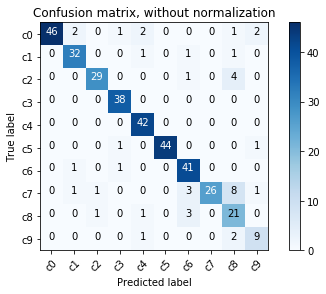

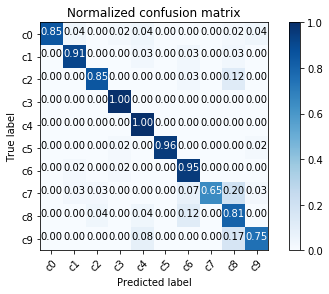

In [27]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

new_model_predictions = [np.argmax(new_model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
npargmaxtest_targets = np.argmax(test_targets, axis=1)
npanew_model_predictions = np.array(new_model_predictions)
cmatrix = confusion_matrix(npargmaxtest_targets, npanew_model_predictions)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmatrix, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cmatrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

To summarize the performance of a final fine tuned VGG16 model I have plotted the confusion matrix (without normalization, and with normalization) as given below. This helps in figuring out the following.
When our data has more than 2 classes. With 3 or more classes we may get a classification accuracy of 80%, but we don’t know if that is because all classes are being predicted equally well or whether one or two classes are being neglected by the model. Also when our data does not have an even number of classes. We may achieve accuracy of 90% or more, but this is not a good score if 90 records for every 100 belong to one class and we can achieve this score by always predicting the most common class value. 

In our case c9 has just 11 images. Other than c9 and c8 all other classes are well represented by having almost equal number of images. If we look at normalized confusion matrix we can see that c7 has the least accuracy. C3, c4, c5 , and c6 have almost perfect predictions.

Overall accuracy = (sum of all True positives along the diagonal) / (Total test images)
Accuracy=(46+32+29+38+42+44+41+26+21+9)/370
Acccuracy=88.6%

As seen from the graph ‘Distribution of data in training directory’ above we notice that C7, C8 and C9 have the least number of training images as compared to other categories. Even though the difference is not much (around 250 images each), the effect on the accuracy is quite evident here. 8images out of 40 which were actually c7 have been classified as c8. 

### Checking the results on some unlabelled test files 
I will make predictions on unlabelled test files(313 nos.) and create an excel file indicating the probability of prediction for each of the 10categories for all the images. Thereafter I will display three of the images and see how the prediction worked.


In [12]:
new_model_predictions_unlabelled_test = [new_model.predict(np.expand_dims(tensor, axis=0))[0] for tensor in unlabelled_test_tensors ]

new_model_consolidate = np.column_stack((np.asarray(unlabelled_test_files), np.asarray(new_model_predictions_unlabelled_test,dtype=np.float32)))
np.savetxt('csv_probability_class prediction/new_model_table.csv',new_model_consolidate, delimiter=',',comments='', newline='\n', fmt='%s', header = 'file_name,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9')
from IPython.display import FileLink
FileLink('csv_probability_class prediction/new_model_table.csv')

/home/ubuntu/.kaggle/competitions/state-farm-distracted-driver-detection/csv_probability_class prediction/new_model_table.csv

In [15]:
print(new_model_consolidate[1:4])

[['imgs_test/unlabelled_data/img_100060.jpg' '0.0008542' '1.4965026e-06'
  '2.7486808e-06' '1.8082568e-05' '1.0326823e-05' '0.9990396'
  '2.4057329e-06' '7.6303905e-08' '5.6138175e-05' '1.48152485e-05']
 ['imgs_test/unlabelled_data/img_100075.jpg' '2.5591994e-06'
  '0.00010923625' '0.010204853' '2.3628297e-07' '0.0010712022'
  '8.314595e-06' '0.005066281' '0.012962939' '0.90308386' '0.067490526']
 ['imgs_test/unlabelled_data/img_100079.jpg' '0.9307986' '0.0012094514'
  '5.616675e-05' '0.0033852751' '0.028729869' '5.5889115e-05'
  '0.00010275289' '3.7222086e-05' '0.0072646304' '0.028360082']]


imgs_test/unlabelled_data/img_100060.jpg


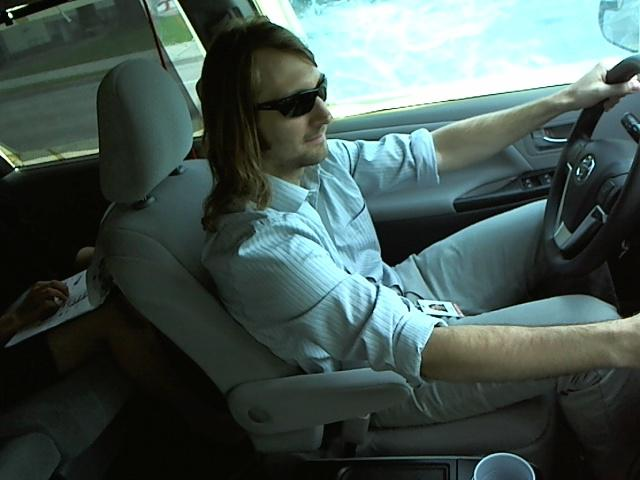

imgs_test/unlabelled_data/img_100075.jpg


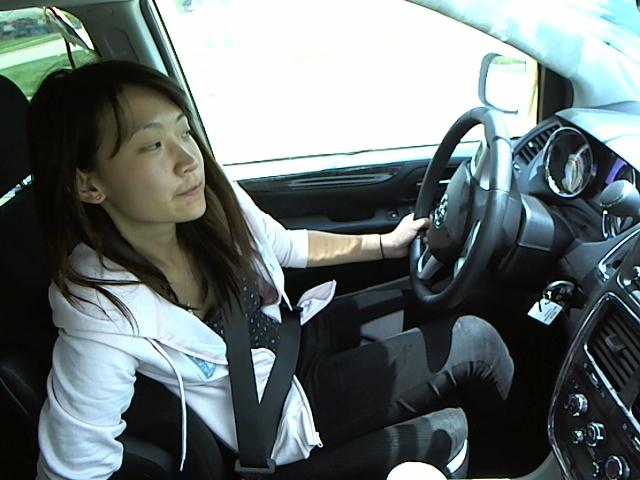

imgs_test/unlabelled_data/img_100079.jpg


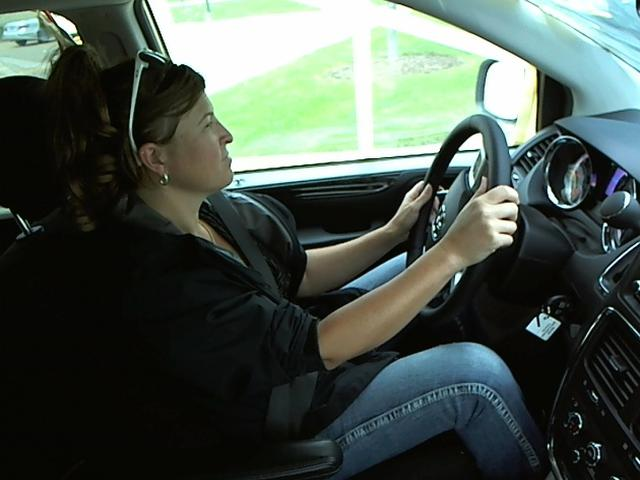

In [16]:
from IPython.core.display import Image, display
import numpy as np
from glob import glob
def sampleunlabelled(img_path=""):
    display(Image(img_path,width=200,height=200))

sample_files = unlabelled_test_files[1:4]
for pics in sample_files:
    print(pics)
    sampleunlabelled(pics)

As per the print(new_model_subm[1:4]) results we observe the following:

1. img_100060 has maximum probability(0.9990396) for c5(operating radio) which is perfect.

2. img_100075.jpg has maximum probability(0.90308386) for c8(hair and make up ) which is wrong as it should be "reaching behind" which is C7. I guess it is because number of training images for hair and make up were very less as compared to others. We need to provide more training data to overcome this.

3. img_100079.jpg has maximum probability(0.9307986) for c0(normal driving) which is perfect

Fine tuning VGG16 gave good results. However, I wanted to check ResNet50 and InceptionResnetV2 also. I will not Fine tune these models, but would just try predicting using bottleneck features.

# Step 4: Use a ResNet50 to Classify Distracted Drivers

## Extract bottleneck features for ResnNet50

In [40]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 224, 224

top_model_weights_path = 'resnet50bottleneck_fc_model.h5'

epochs = 50
batch_size = 10


def save_bottleneck_featuresresnet50():
    datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.1,
                                   zoom_range = 0.1,)

    # build the Resnet50 network
    model = applications.ResNet50(include_top=False, weights='imagenet')

    generatorresnet50 = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_trainresnet50 = model.predict_generator(
        generatorresnet50, nb_train_samples // batch_size)
    np.save(open('bottleneck_features_trainresnet50.npy', 'ab'),
            bottleneck_features_trainresnet50)

    generatorresnet50 = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validationresnet50 = model.predict_generator(
        generatorresnet50, nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_validationresnet50.npy', 'ab'),
            bottleneck_features_validationresnet50)
    
    generatorresnet50 = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_testresnet50 = model.predict_generator(
        generatorresnet50, nb_test_samples // batch_size)
    np.save(open('bottleneck_features_testresnet50.npy', 'ab'),
            bottleneck_features_testresnet50)
    
save_bottleneck_featuresresnet50()
    

94658560/94653016 [==============================] - 18s 0us/step
Found 18930 images belonging to 10 classes.
Found 3490 images belonging to 10 classes.
Found 370 images belonging to 10 classes.


### Model Architecture

In [42]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
train_resnet50 = np.load(open('bottleneck_features_trainresnet50.npy', 'rb'))
train_labels = train_targets

    
validation_resnet50 = np.load(open('bottleneck_features_validationresnet50.npy', 'rb'))
validation_labels = valid_targets

test_resnet50 = np.load(open('bottleneck_features_testresnet50.npy', 'rb'))
test_labels = test_targets

resnet50_model = Sequential()
resnet50_model.add(GlobalAveragePooling2D(input_shape=train_resnet50.shape[1:]))
resnet50_model.add(Dense(10, activation='softmax'))

resnet50_model.summary()
print('train resnet50 numbers', len(train_resnet50))

print('valid resnet50 numbers', len(validation_resnet50))
print('input shapes train resnet50', train_resnet50.shape[1:])
print('test_resnet50 shapes', test_resnet50.shape[1:])
print('valid_resnet50 shapes', validation_resnet50.shape[1:])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_6 ( (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________
train resnet50 numbers 18930
valid resnet50 numbers 3490
input shapes train resnet50 (1, 1, 2048)
test_resnet50 shapes (1, 1, 2048)
valid_resnet50 shapes (1, 1, 2048)


###  Compile the model

In [43]:
### TODO: Compile the model.
resnet50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [60]:
### TODO: Train the model.
from keras.callbacks import ModelCheckpoint


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.resnet50.hdf5', 
                               verbose=1, save_best_only=True)

resnet50_model.fit(train_resnet50, train_targets, 
          validation_data=(validation_resnet50, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 18930 samples, validate on 3490 samples
Epoch 1/20
18930/18930 [==============================] - 3s 174us/step - loss: 2.3278 - acc: 0.1081 - val_loss: 2.3532 - val_acc: 0.1023

Epoch 00001: val_loss improved from inf to 2.35317, saving model to saved_models/weights.best.resnet50.hdf5
Epoch 2/20
18930/18930 [==============================] - 3s 173us/step - loss: 2.3283 - acc: 0.1121 - val_loss: 2.3617 - val_acc: 0.1000

Epoch 00002: val_loss did not improve
Epoch 3/20
18930/18930 [==============================] - 3s 173us/step - loss: 2.3256 - acc: 0.1117 - val_loss: 2.3765 - val_acc: 0.1066

Epoch 00003: val_loss did not improve
Epoch 4/20
18930/18930 [==============================] - 3s 172us/step - loss: 2.3262 - acc: 0.1105 - val_loss: 2.3793 - val_acc: 0.0928

Epoch 00004: val_loss did not improve
Epoch 5/20
18930/18930 [==============================] - 3s 172us/step - loss: 2.3264 - acc: 0.1126 - val_loss: 2.3476 - val_acc: 0.0868

Epoch 00005: val_loss improved fro

In [61]:
### TODO: Load the model weights with the best validation loss.
resnet50_model.load_weights('saved_models/weights.best.resnet50.hdf5')

In [62]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted class for each image in test set
resnet50_predictions = [np.argmax(resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_resnet50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(resnet50_predictions)==np.argmax(test_targets, axis=1))/len(resnet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 14.5946%


This accuracy is more than similar  model of VGG16 which was 11.5%.

## Step6: Use 'InceptionResNetV2 to classify distracted drivers

In [22]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_inc_width, img_inc_height = 299, 299

top_model_weights_path = 'InceptionResNetV2bottleneck_fc_model.h5'

epochs = 50
batch_size = 10

# build the InceptionResNetV2 network
model = applications.InceptionResNetV2(include_top=False, weights='imagenet')

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

                                                                 block8_6_conv[0][0]              
__________________________________________________________________________________________________
block8_6_ac (Activation)        (None, None, None, 2 0           block8_6[0][0]                   
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, None, None, 1 399360      block8_6_ac[0][0]                
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, None, None, 1 576         conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, None, None, 1 0           batch_normalization_189[0][0]    
__________________________________________________________________________________________________
conv2d_190

## Extract bottleneck features of InceptionResNetV2

In [23]:
def save_bottleneck_featuresInceptionResNetV2():
    datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.1,
                                   zoom_range = 0.1,)

   

    train_generatorInceptionResNetV2 = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_inc_width, img_inc_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_trainInceptionResNetV2 = model.predict_generator(
        train_generatorInceptionResNetV2, nb_train_samples // batch_size)
    np.save(open('bottleneck_features_trainInceptionResNetV2.npy', 'ab'),
            bottleneck_features_trainInceptionResNetV2)

    validation_generatorInceptionResNetV2 = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_inc_width, img_inc_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validationInceptionResNetV2 = model.predict_generator(
        validation_generatorInceptionResNetV2, nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_validationInceptionResNetV2.npy', 'ab'),
            bottleneck_features_validationInceptionResNetV2)
    
    test_generatorInceptionResNetV2 = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_inc_width, img_inc_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_testInceptionResNetV2 = model.predict_generator(
        test_generatorInceptionResNetV2, nb_test_samples // batch_size)
    np.save(open('bottleneck_features_testInceptionResNetV2.npy', 'ab'), bottleneck_features_testInceptionResNetV2)
    
    
    #unlabelled_test_generatorInceptionResNetV2 = datagen.flow_from_directory, unlabelled_test_data_dir, target_size=(img_width, img_height),
        #batch_size=batch_size, class_mode=None, shuffle=False)
    #bottleneck_features_unlabelled_testInceptionResNetV2 = model.predict_generator(
        #unlabelled_generatorInceptionResNetV2, nb_unlabelled_test_samples // batch_size)
    #np.save(open('bottleneck_features_unlabelled_testInceptionResNetV2.npy', 'ab'), bottleneck_features_unlabelled_testInceptionResNetV2)
    
save_bottleneck_featuresInceptionResNetV2()

Found 18930 images belonging to 10 classes.
Found 3490 images belonging to 10 classes.
Found 370 images belonging to 10 classes.


In [31]:
datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.1,
                                   zoom_range = 0.1,)

   
train_generatorInceptionResNetV2 = datagen.flow_from_directory(train_data_dir, target_size=(img_inc_width, img_inc_height),
                                                               batch_size=batch_size, class_mode=None, shuffle=False)

nbtrainsamples = len(train_generatorInceptionResNetV2.filenames)
numclasses = len(train_generatorInceptionResNetV2.class_indices)
print(nbtrainsamples)
print(numclasses)

Found 18930 images belonging to 10 classes.
18930
10


In [32]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
train_InceptionResNetV2 = np.load(open('bottleneck_features_trainInceptionResNetV2.npy', 'rb'))
train_labels = train_targets

    
validation_InceptionResNetV2 = np.load(open('bottleneck_features_validationInceptionResNetV2.npy', 'rb'))
validation_labels = valid_targets

test_InceptionResNetV2 = np.load(open('bottleneck_features_testInceptionResNetV2.npy', 'rb'))
test_labels = test_targets

InceptionResNetV2_model = Sequential()
InceptionResNetV2_model.add(GlobalAveragePooling2D(input_shape=train_InceptionResNetV2.shape[1:]))
InceptionResNetV2_model.add(Dense(10, activation='softmax'))

InceptionResNetV2_model.summary()
print('train InceptionResNetV2 numbers', len(train_InceptionResNetV2))

print('valid InceptionResNetV2 numbers', len(validation_InceptionResNetV2))
print('input shapes train InceptionResNetV2', train_InceptionResNetV2.shape[1:])
print('test_InceptionResNetV2 shapes', test_InceptionResNetV2.shape[1:])
print('valid_InceptionResNetV2 shapes', validation_InceptionResNetV2.shape[1:])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15370     
Total params: 15,370
Trainable params: 15,370
Non-trainable params: 0
_________________________________________________________________
train InceptionResNetV2 numbers 18930
valid InceptionResNetV2 numbers 3490
input shapes train InceptionResNetV2 (5, 5, 1536)
test_InceptionResNetV2 shapes (5, 5, 1536)
valid_InceptionResNetV2 shapes (5, 5, 1536)


In [33]:
### TODO: Compile the model.
InceptionResNetV2_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [53]:
### TODO: Train the model.
from keras.callbacks import ModelCheckpoint


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.InceptionResNetV2.hdf5', 
                               verbose=1, save_best_only=True)

InceptionResNetV2_model.fit(train_InceptionResNetV2, train_targets, 
          validation_data=(validation_InceptionResNetV2, valid_targets),
          epochs=7, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 18930 samples, validate on 3490 samples
Epoch 1/7
18930/18930 [==============================] - 4s 222us/step - loss: 2.3762 - acc: 0.1379 - val_loss: 2.7186 - val_acc: 0.0868

Epoch 00001: val_loss improved from inf to 2.71856, saving model to saved_models/weights.best.InceptionResNetV2.hdf5
Epoch 2/7
18930/18930 [==============================] - 4s 222us/step - loss: 2.3693 - acc: 0.1420 - val_loss: 3.0939 - val_acc: 0.1017

Epoch 00002: val_loss did not improve
Epoch 3/7
18930/18930 [==============================] - 4s 222us/step - loss: 2.3662 - acc: 0.1440 - val_loss: 2.6437 - val_acc: 0.1000

Epoch 00003: val_loss improved from 2.71856 to 2.64373, saving model to saved_models/weights.best.InceptionResNetV2.hdf5
Epoch 4/7
18930/18930 [==============================] - 4s 221us/step - loss: 2.3580 - acc: 0.1426 - val_loss: 2.6943 - val_acc: 0.0894

Epoch 00004: val_loss did not improve
Epoch 5/7
18930/18930 [==============================] - 4s 222us/step - loss: 2.3555

In [54]:
### TODO: Load the model weights with the best validation loss.
InceptionResNetV2_model.load_weights('saved_models/weights.best.InceptionResNetV2.hdf5')

In [55]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted class for each image in test set
InceptionResNetV2_predictions = [np.argmax(InceptionResNetV2_model.predict(np.expand_dims(feature, axis=0))) for feature in test_InceptionResNetV2]

# report test accuracy
test_accuracy = 100*np.sum(np.array(InceptionResNetV2_predictions)==np.argmax(test_targets, axis=1))/len(InceptionResNetV2_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 10.2703%


This accuracy is least compared to similar models of VGG16(11.5%) and ResNet50 (14.6%). In future I would like to Finetune ResNet50. Looks like it will give a very good accuracy because in similar models its accuracy is highest.